In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',100)

In [2]:
canvass_data = pd.read_csv('bgny_ddvc_data.csv')
canvass_data.head()

,Canvasser,Office,Knocks,Contacts,Support (1's & 2's),Undecided (3's),Oppose (4's & 5's),Refused,Inaccessible
0,Amelia Davis,District 1,299,80,41,27,12,22,11
1,Andrew Jackson,District 3,254,64,37,17,10,21,11
2,Anthony Anderson,District 2,480,127,64,43,20,40,33
3,Asher Gonzales,District 1,261,87,55,18,14,18,9
4,Ashley Scott,District 3,301,142,80,39,23,16,9


In [3]:
summary_stats = (
    canvass_data.groupby("Office")
    .agg({"Knocks": "sum", "Support (1's & 2's)": "sum", "Oppose (4's & 5's)": "sum", "Contacts": "sum", "Canvasser": "count"})
    .rename({"Canvasser": "shifts"}, axis=1)
)

canvass_data["conversion_rate"] = canvass_data["Support (1's & 2's)"] / canvass_data["Contacts"]
canvass_data["contact_rate"] = canvass_data["Contacts"] / canvass_data["Knocks"]

district_data = {
    f'District {i}': canvass_data.loc[canvass_data.Office == f'District {i}'] for i in range (1,4)
}
stds = {office: data.conversion_rate.std() for office, data in district_data.items()}

summary_stats["contact_rate"] = summary_stats["Contacts"] / summary_stats["Knocks"]
summary_stats["conversion_rate"] = summary_stats["Support (1's & 2's)"] / summary_stats["Contacts"]
summary_stats["conversion_rate_std"] = stds
summary_stats

,Knocks,Support (1's & 2's),Oppose (4's & 5's),Contacts,shifts,contact_rate,conversion_rate,conversion_rate_std
Office,,,,,,,,
District 1,5624,899,266,1693,22,0.301031,0.531010,0.110006
District 2,7205,1230,345,2251,20,0.312422,0.546424,0.113346
District 3,6771,1014,314,2018,20,0.298036,0.502478,0.087419


(array([1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
        0., 1., 2., 1., 2., 1., 0., 1., 0., 1., 1., 1., 1.]),
 array([254. , 258.8, 263.6, 268.4, 273.2, 278. , 282.8, 287.6, 292.4,
        297.2, 302. , 306.8, 311.6, 316.4, 321.2, 326. , 330.8, 335.6,
        340.4, 345.2, 350. , 354.8, 359.6, 364.4, 369.2, 374. , 378.8,
        383.6, 388.4, 393.2, 398. ]),
 <BarContainer object of 30 artists>)

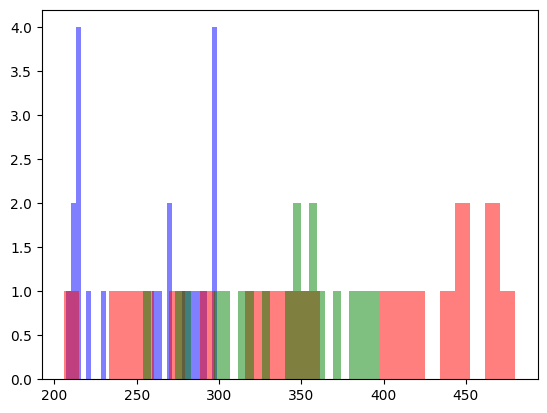

In [4]:
plt.hist(canvass_data.loc[canvass_data.Office == 'District 1', 'Knocks'], alpha=0.5, bins=30, label='D1', color='blue')
plt.hist(canvass_data.loc[canvass_data.Office == 'District 2', 'Knocks'], alpha=0.5, bins=30, label='D2', color='red')
plt.hist(canvass_data.loc[canvass_data.Office == 'District 3', 'Knocks'], alpha=0.5, bins=30, label='D3', color='green')

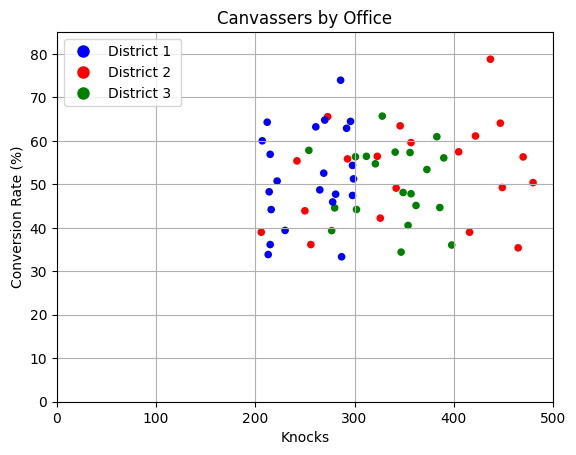

In [5]:
canvass_data["color"] = canvass_data.Office.map({'District 1': 'blue', 'District 2': 'red', 'District 3': 'green'})
canvass_data["conversion_rate"] = canvass_data["Support (1's & 2's)"] / canvass_data["Contacts"] * 100
canvass_data.plot(
    x='Knocks',
    y="conversion_rate",
    kind='scatter',
    title='Canvassers by Office',
    c="color",
    xlim=[0,500],
    ylim=[0,85],
    ylabel='Conversion Rate (%)'
)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category)
                   for category, color in {'District 1 ': 'blue', 'District 2': 'red', 'District 3': 'green'}.items()]
plt.legend(handles=legend_elements, loc='upper left')
plt.grid('both')

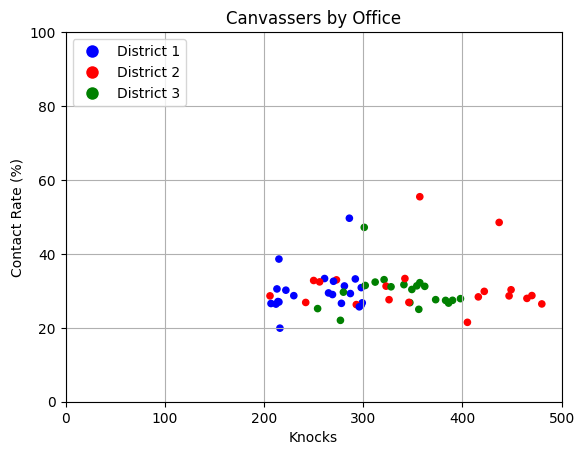

In [7]:
canvass_data["color"] = canvass_data.Office.map({'District 1': 'blue', 'District 2': 'red', 'District 3': 'green'})
canvass_data["contact_rate"] = canvass_data["Contacts"] / canvass_data["Knocks"] * 100
canvass_data.plot(
    x='Knocks',
    y="contact_rate",
    kind='scatter',
    title='Canvassers by Office',
    c="color",
    xlim=[0,500],
    ylim=[0,100],
    ylabel='Contact Rate (%)'
)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category)
                   for category, color in {'District 1': 'blue', 'District 2': 'red', 'District 3': 'green'}.items()]
plt.legend(handles=legend_elements, loc='upper left')
plt.grid('both')

In [72]:
canvass_data.sort_values('contact_rate', ascending=False)

,Canvasser,Office,Knocks,Contacts,Support (1's & 2's),Undecided (3's),Oppose (4's & 5's),Refused,Inaccessible,color,conversion_rate,contact_rate,Conversion Rate
31,Leo Murphy,District 2,357,198,118,51,29,19,13,red,59.595960,0.554622,59.595960
52,Paul Martin,District 1,286,142,105,14,23,17,7,blue,73.943662,0.496503,73.943662
58,Steven Moore,District 2,437,212,167,12,33,28,18,red,78.773585,0.485126,78.773585
4,Ashley Scott,District 3,301,142,80,39,23,16,9,green,56.338028,0.471761,56.338028
59,Susan Ramirez,District 1,215,83,30,40,13,14,6,blue,36.144578,0.386047,36.144578
57,Sophia Miller,District 2,342,114,56,39,19,28,17,red,49.122807,0.333333,49.122807
3,Asher Gonzales,District 1,261,87,55,18,14,18,9,blue,63.218391,0.333333,63.218391
14,Donna Flores,District 1,292,97,61,20,16,24,11,blue,62.886598,0.332192,62.886598
19,Emma Jones,District 3,321,106,58,31,17,24,19,green,54.716981,0.330218,54.716981
44,Michael Williams,District 2,273,90,59,18,13,21,15,red,65.555556,0.329670,65.555556
